In [2]:
import cv2

import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm

In [17]:
def showImage(img,size=10):
    plt.figure(figsize=(size,size))
    plt.imshow(img,cmap="gray")

In [45]:
def adjustContrast(img,c):
    return np.minimum(img * c, 255)

3024 4032


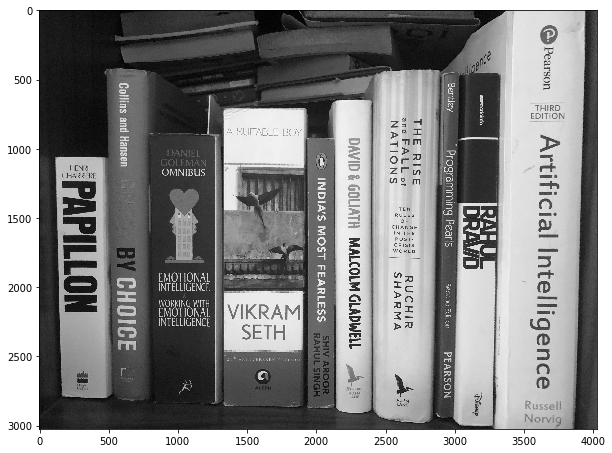

In [46]:
# Read the image
img = cv2.imread("images/bookshelf3b.jpeg",cv2.IMREAD_GRAYSCALE)
height, width = img.shape[:2]

print(height, width)
showImage(img)


0.0


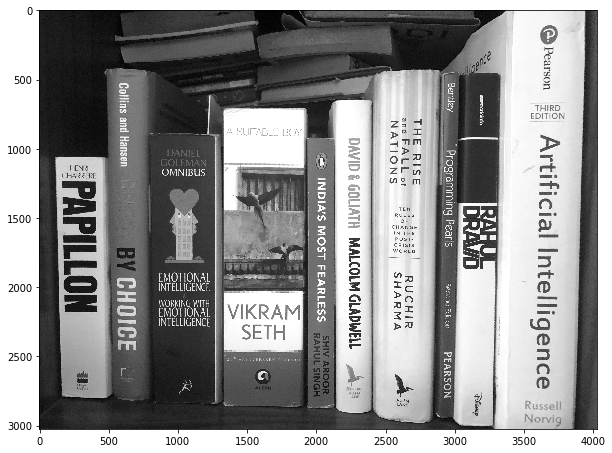

In [57]:
# Increase contrast a bit
img_c = adjustContrast(img,1.1)

print(img_c.min())
showImage(img_c)

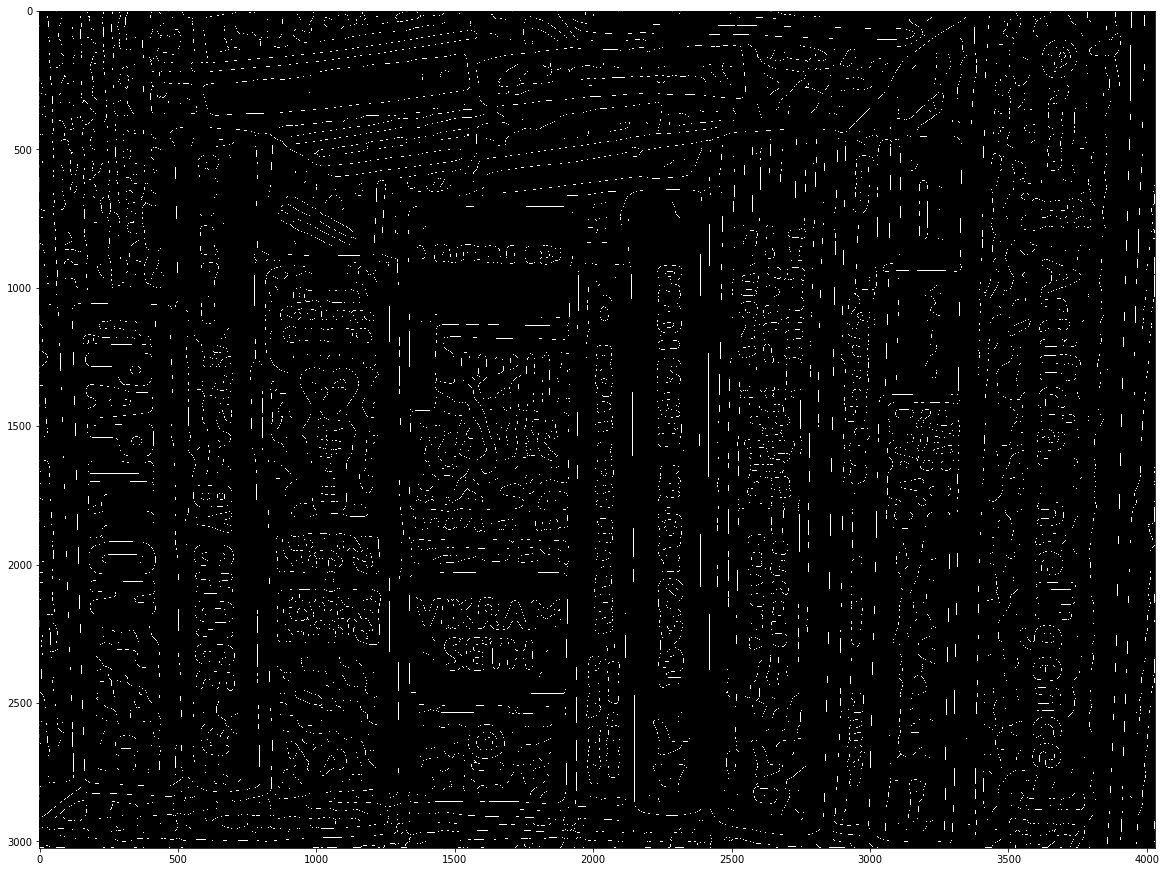

In [59]:
# Apply canny edge detector
# https://scikit-image.org/docs/stable/api/skimage.feature.html#canny

im_edge = canny(img_c,sigma=13)
showImage(im_edge,20)

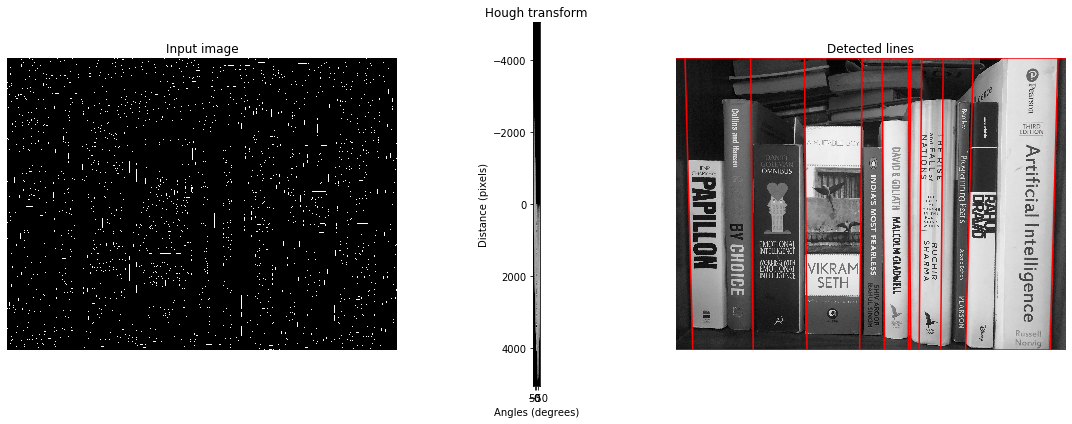

In [60]:
# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
h, theta, d = hough_line(im_edge)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(im_edge, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(img, cmap=cm.gray)
origin = np.array((0, im_edge.shape[1]))
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')
ax[2].set_xlim(origin)
ax[2].set_ylim((im_edge.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

